import Pandas library and load up CVS files

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head() #use .tail() to view last 5 rows

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


check if there is missing data in the current dataframe

In [44]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

Drop irrelevant columns

In [38]:
new_columns = ['Package', 'Month', 'Date', 'Low Price', 'High Price']
pumpkins = pumpkins.drop(columns=[c for c in pumpkins.columns if c not in new_columns])
print(pumpkins)

                   Package     Date  Low Price  High Price
70    1 1/9 bushel cartons  9/24/16      15.00        15.0
71    1 1/9 bushel cartons  9/24/16      18.00        18.0
72    1 1/9 bushel cartons  10/1/16      18.00        18.0
73    1 1/9 bushel cartons  10/1/16      17.00        17.0
74    1 1/9 bushel cartons  10/8/16      15.00        15.0
...                    ...      ...        ...         ...
1738    1/2 bushel cartons  9/30/16      15.00        15.0
1739    1/2 bushel cartons  9/30/16      13.75        15.0
1740    1/2 bushel cartons  9/30/16      10.75        15.0
1741    1/2 bushel cartons  9/30/16      12.00        12.0
1742    1/2 bushel cartons  9/30/16      12.00        12.0

[415 rows x 4 columns]


Calculate Average Price and Convert Date to Month

In [41]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

In [45]:
data = {'Month': month, 'Package': pumpkins['Package'], 'Price':price, 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price']}
new_pumpkins = pd.DataFrame(data=data)
# replace the price of pumpkin that has package of 1 1/9 bushel 
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9) 
# replace the price of pumpkin that has package of 1/2 bushel 
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Price  Low Price  High Price
70        9  1 1/9 bushel cartons  13.50      15.00        15.0
71        9  1 1/9 bushel cartons  16.20      18.00        18.0
72       10  1 1/9 bushel cartons  16.20      18.00        18.0
73       10  1 1/9 bushel cartons  15.30      17.00        17.0
74       10  1 1/9 bushel cartons  13.50      15.00        15.0
...     ...                   ...    ...        ...         ...
1738      9    1/2 bushel cartons  30.00      15.00        15.0
1739      9    1/2 bushel cartons  28.75      13.75        15.0
1740      9    1/2 bushel cartons  25.75      10.75        15.0
1741      9    1/2 bushel cartons  24.00      12.00        12.0
1742      9    1/2 bushel cartons  24.00      12.00        12.0

[415 rows x 5 columns]


Plot data

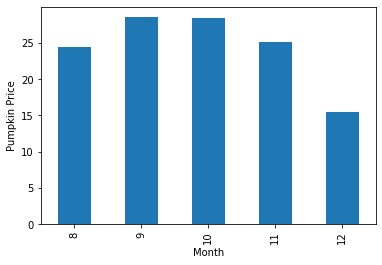

In [56]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')
plt.xlabel('Month')
plt.show()